In [0]:
import pandas as pd 
from sklearn import linear_model 
from sklearn.metrics import explained_variance_score
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
import pandas as pd 
from sklearn import linear_model 
from sklearn.metrics import explained_variance_score
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

A = pd.read_csv('AmesHousingSetA.csv')

B = pd.read_csv('AmesHousingSetB.csv')


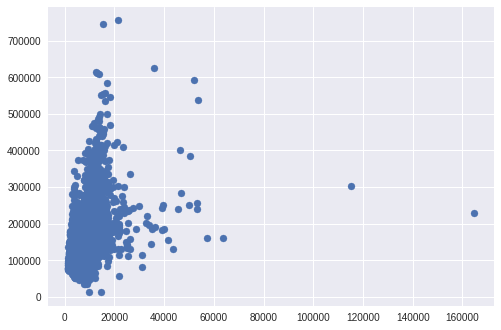

In [57]:

plt.scatter(A['Lot.Area'], A['SalePrice'])

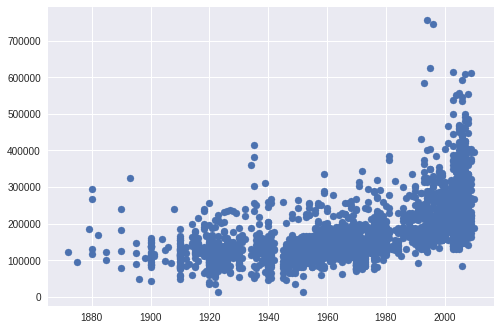

In [76]:
plt.scatter(A['Year.Built'], A['SalePrice'])


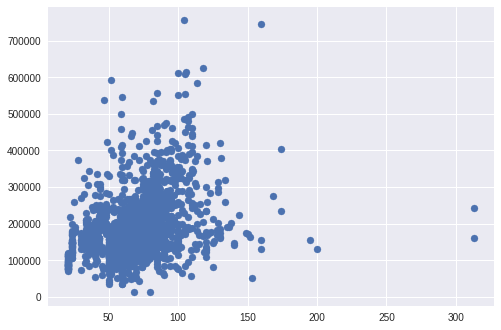

In [75]:
plt.scatter(A['Lot.Frontage'], A['SalePrice'])


##Drops columns with null values and splits data set

In [0]:

A = A[A.columns[A.isnull().mean() < 0.1]]

A_y = A[list(A)[-1]]
A_x = A[list(A)[:74]]


##Gets categorical features

In [11]:
def cat_features(dataframe):
    td = pd.DataFrame({'a':[1,2,3], 'b':[1.0, 2.0, 3.0]})
    return filter(lambda x: not(dataframe[x].dtype in [td['a'].dtype, td['b'].dtype]), list(dataframe))

C = list(cat_features(A))
C


['MS.Zoning',
 'Street',
 'Lot.Shape',
 'Land.Contour',
 'Utilities',
 'Lot.Config',
 'Land.Slope',
 'Neighborhood',
 'Condition.1',
 'Condition.2',
 'Bldg.Type',
 'House.Style',
 'Roof.Style',
 'Roof.Matl',
 'Exterior.1st',
 'Exterior.2nd',
 'Mas.Vnr.Type',
 'Exter.Qual',
 'Exter.Cond',
 'Foundation',
 'Bsmt.Qual',
 'Bsmt.Cond',
 'Bsmt.Exposure',
 'BsmtFin.Type.1',
 'BsmtFin.Type.2',
 'Heating',
 'Heating.QC',
 'Central.Air',
 'Electrical',
 'Kitchen.Qual',
 'Functional',
 'Garage.Type',
 'Garage.Finish',
 'Garage.Qual',
 'Garage.Cond',
 'Paved.Drive',
 'Sale.Type',
 'Sale.Condition']

##one hot encodes data and fills in Na values



In [0]:


A_x = pd.get_dummies(A, columns=['MS.Zoning','Street','Lot.Shape','Land.Contour','Utilities','Lot.Config','Land.Slope','Neighborhood','Condition.1','Condition.2','Bldg.Type','House.Style','Roof.Style','Roof.Matl','Exterior.1st','Exterior.2nd','Mas.Vnr.Type','Exter.Qual','Exter.Cond','Foundation','Bsmt.Qual','Bsmt.Cond','Bsmt.Exposure','BsmtFin.Type.1','BsmtFin.Type.2','Heating','Heating.QC','Central.Air','Electrical','Kitchen.Qual', 'Functional','Garage.Type','Garage.Finish','Garage.Qual','Garage.Cond','Paved.Drive','Sale.Type','Sale.Condition'], drop_first=True)
for col in A_x:
  A_x[col].fillna(A_x[col].mean(), inplace=True)


##creates model  

In [14]:
model = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(A_x, A_y, test_size = 0.2, random_state = 4)
model.fit(train_x_pp,y_train)
imp = preprocessing.Imputer(missing_values='NaN', strategy = 'mean', axis=0)
scaler = preprocessing.StandardScaler()
train_x_pp = imp.fit_transform(x_train)
train_x_pp = scaler.fit_transform(train_x_pp)
test_x_pp = imp.transform(x_test)
test_x_pp = scaler.transform(test_x_pp)
predicts = model.predict(test_x_pp)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [16]:
#model = linear_model.LinearRegression()
#x_train, x_test, y_train, y_test = train_test_split(A_x, A_y, test_size = 0.2, random_state = 4)
#model.fit(train_x_pp,y_train)
predicts = model.predict(x_test)
print('R2 Base:'+ str(r2_score(y_test, predicts)))

R2 Base:-38979144337.18903


##Creates lasso model

In [17]:
alphas = [0.0, 0.01, 0.05, 0.25, 0.5]
for a in alphas:
  las = linear_model.Lasso(alpha = a, normalize=True, fit_intercept=True)
  las.fit(train_x_pp, y_train)
  predicts = las.predict(test_x_pp)
  print('R2 alpha of ' + str(a) + " is " + str(r2_score(y_test, predicts)) )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


R2 alpha of 0.0 is 0.9999990120857466
R2 alpha of 0.01 is 0.9999997184972126
R2 alpha of 0.05 is 0.9999999952201228
R2 alpha of 0.25 is 0.9999999819653971
R2 alpha of 0.5 is 0.9999999278615884


##Testing on B dataset

one hot encoding B datasets

In [0]:

B_y = B[list(B)[-1]]
B_x = B[list(B)[:80]]


In [0]:
Z = list(cat_features(B))

B_x = pd.get_dummies(B, columns=['Lot.Config','Land.Slope','Neighborhood','Condition.1','Condition.2','Bldg.Type','House.Style','Roof.Style', 'Roof.Matl','Exterior.1st','Exterior.2nd','Mas.Vnr.Type','Exter.Qual','Exter.Cond','Foundation','Bsmt.Qual','Bsmt.Cond','Bsmt.Exposure','BsmtFin.Type.1','BsmtFin.Type.2','Heating','Heating.QC','Central.Air','Electrical','Kitchen.Qual','Functional','Fireplace.Qu','Garage.Type','Garage.Finish','Garage.Qual','Garage.Cond','Paved.Drive','Pool.QC','Fence','Misc.Feature','Sale.Type','Sale.Condition','MS.Zoning','Street','Alley','Lot.Shape','Land.Contour','Utilities'], drop_first=True)


In [0]:
for col in B_x:
  B_x[col].fillna(B_x[col].mean(), inplace=True)

In [0]:
for i in B_x.columns:
  if i not in A_x.columns:
    del B_x[i]
for i in A_x.columns:
  if i not in B_x.columns:
    B_x[i] = pd.Series(np.zeros(len(B)))




In [44]:
predic = las.predict(B_x)
print('R2 alpha of ' + str(a) + " is " + str(r2_score(B_y, predic)) )



R2 alpha of 0.5 is -44871370971.36697


In [45]:
predic = model.predict(B_x)
print('R2 Base:'+ str(r2_score(B_y, predic)))

R2 Base:-44895099133.82979


##Question 1:

Prior to exploratory and analysis, I used a function that deleted all of the rows that had more than 10% of its values as null. This eliminated some of the randomness of the model while still maintaining the majority of the integrity of the model. I believed that this corrected a better dataset to test the data on because it did not have to interpret null values which could bias the dataset

##Question 2:
1)  When looking at basic scatter plots between various X's and Y's, it can be seen that there seems to be a positive relationship between Lot area, lot frontage, and year built. It would make sense that for most sales, a larger lot and lot frontage would fetch a higher price. The year built also makes sense as newer technologies in house building, while making it more efficient also raises the home value. Year sold was not a good a good measure because there was not a measure as there was little variation. All houses were sold between 2006 and 2010. 

2) I believe the variables that I examined will have a positive and significant impact on the price of a house. Other variables such as alley or land contour will not have a significant impact on the price of a house in my opinion. 

##Question 3
1)
I used a basic linear regression to first test the model. Of which, I got a R2 of -38979144337.18903. Then A Lasso regression was implemented and across the multiple alpha values used, the R2 was consistantly around 0.99. I believed that the Lasso model would enhance the predication accuracy and intrepredibility of the model.
2)
The error metric used on this model was the R2. It was the metric most familiar to me and is a good estimate of the overall fit of the model. The R2 of the base model was -38979144337.18903 and 0.99 for the best model. 

##Question 4
1)The R2 on base model of dataset A was -38979144337.18903, however when implemented on dataste B it was significantly worse at -44871370971.36697. This was true of both the basic regression and the lasso regression model. 
2) My best model seemed to work well on dataset A, however when implemented on dataset B, the result seemed to say that the model was not a good model at predicting on random datasets. There was no where near enough fit to find any conclusive results in dataset B. 